# Titanic - Machine Learning from Disaster
### Prepared by Daniam henriques - 2024

![Alternate Text if image doesn't load](https://imageio.forbes.com/specials-images/dam/imageserve/877330410/960x0.jpg?format=jpg&width=1440)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Load the training data
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Load test data
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [6]:
combined_pd = pd.concat([train_data, test_data], axis=0)
combined_pd.drop('Survived', axis=1, inplace=True)
combined_pd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: ylabel='Frequency'>

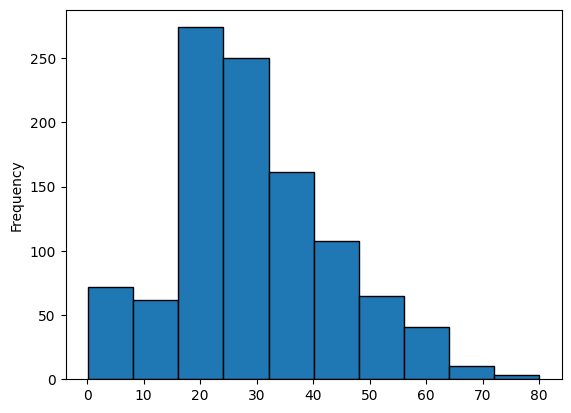

In [7]:
#Age distribution
combined_pd['Age'].plot(kind='hist', edgecolor='black')

In [8]:
# Lets try grouping passengers into age bands and using that as a feature in the random forest classifer
train_data['Age_category'] = train_data.loc[:, 'Age']

def categorize_age(age):
    return age // 10


train_data['Age_category'] = train_data['Age'].apply(categorize_age)
train_data['Age_category'] = train_data['Age_category'].fillna(0).astype(int)
train_data['Age_category'].astype(int)
train_data.head()

test_data['Age_category'] = test_data.loc[:, 'Age']

def categorize_age(age):
    return age // 10


test_data['Age_category'] = test_data['Age'].apply(categorize_age)
test_data['Age_category'] = test_data['Age_category'].fillna(0).astype(int)
test_data['Age_category'].astype(int)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,4
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,6
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Select features
features = ["Pclass", "Sex", "SibSp", "Parch", "Age_category"]

# Prepare the data
X = pd.get_dummies(train_data[features])
y = train_data["Survived"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = model.predict(X_val)

# Calculate and print metrics
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions)
recall = recall_score(y_val, val_predictions)
f1 = f1_score(y_val, val_predictions)
conf_matrix = confusion_matrix(y_val, val_predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Make predictions on the test set
predictions = model.predict(pd.get_dummies(test_data[features]))

# Save predictions to CSV
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Accuracy: 0.8101
Precision: 0.8226
Recall: 0.6892
F1 Score: 0.7500
Confusion Matrix:
[[94 11]
 [23 51]]
Your submission was successfully saved!


## References
[1] Bressan, David. Image of the Titanic. 14 Apr. 2019. A Geological Study Of The Titanic Shipwreck Site, Forbes, https://imageio.forbes.com/specials-images/dam/imageserve/877330410/960x0.jpg?format=jpg&width=1440. Accessed 26 Jan. 2024. 